📁 Upload your traditional stats file


Saving nba_traditional_RS_2020_2025.csv to nba_traditional_RS_2020_2025 (5).csv


/tmp/ipython-input-10-3483779393.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Smart_Efficiency_Score', y='PLAYER', data=top10, palette='crest')
/tmp/ipython-input-10-3483779393.py:61: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-10-3483779393.py:62: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.savefig("top10_smart_efficiency_final_2024_25.jpg", format='jpg', dpi=300)
/tmp/ipython-input-10-3483779393.py:62: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.savefig("top10_smart_efficiency_final_2024_25.jpg", format='jpg', dpi=300)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes

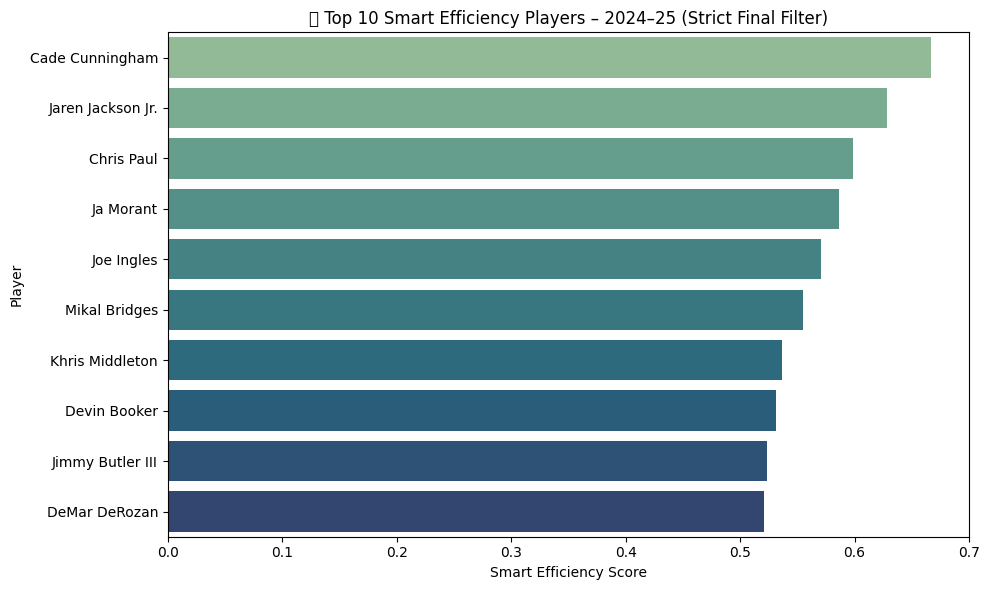

In [10]:
# 📓 Smart Efficiency Score – FINAL Strict Version – NBA 2024–25
# 🔍 Based on AST/TO ratio and scoring efficiency with tight filters

# 🟦 STEP 1: Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from google.colab import files

# 🟦 STEP 2: Upload Your Traditional Stats CSV
print("📁 Upload your traditional stats file")
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# 🟦 STEP 3: Load Data
df = pd.read_csv(filename)

# Convert relevant columns to numeric
cols = ['PTS', 'FGA', 'FTA', 'AST', 'TOV', 'AST_TOV', 'GP', 'MIN']
for col in cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 🟦 STEP 4: Final Strict Filters
df = df[
    (df['MIN'] > 1000) &
    (df['PTS'] > 800) &
    ((df['FGA'] + df['FTA']) > 400)
]

# 🟦 STEP 5: Compute Scoring Efficiency
df['Scoring_Eff'] = df['PTS'] / (df['FGA'] + 0.5 * df['FTA'])

# 🟦 STEP 6: Use AST_TO (assist-to-turnover ratio)
df['AST_TO'] = df['AST_TOV']
df = df.replace([float('inf'), -float('inf')], pd.NA)
df = df.dropna(subset=['AST_TO', 'Scoring_Eff'])

# 🟦 STEP 7: Normalize both components
scaler = MinMaxScaler()
norm_cols = ['Scoring_Eff', 'AST_TO']
df_norm = pd.DataFrame(scaler.fit_transform(df[norm_cols]), columns=[f"norm_{c}" for c in norm_cols])

# 🟦 STEP 8: Final Weighted Smart Efficiency Score
df['Smart_Efficiency_Score'] = (
    0.6 * df_norm['norm_AST_TO'] + 0.4 * df_norm['norm_Scoring_Eff']
)

# 🟦 STEP 9: Top 10 Results
top10 = df.sort_values(by='Smart_Efficiency_Score', ascending=False).head(10)
top10 = top10[['PLAYER', 'TEAM', 'MIN', 'PTS', 'FGA', 'FTA', 'AST_TO', 'Scoring_Eff', 'Smart_Efficiency_Score']]
top10.reset_index(drop=True, inplace=True)
top10

# 🟦 STEP 10: Plot and Save
plt.figure(figsize=(10, 6))
sns.barplot(x='Smart_Efficiency_Score', y='PLAYER', data=top10, palette='crest')
plt.title('🧠 Top 10 Smart Efficiency Players – 2024–25 (Strict Final Filter)')
plt.xlabel('Smart Efficiency Score')
plt.ylabel('Player')
plt.tight_layout()
plt.savefig("top10_smart_efficiency_final_2024_25.jpg", format='jpg', dpi=300)
plt.show()